### Z - Scores

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

houses = pd.read_table('./datasets/AmesHousing_1.txt')
houses.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,131770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [20]:
#print('MEAN - ',houses['SalePrice'].describe())
print(houses['SalePrice'].sample(1, random_state = 0), '\n')

print('MEAN - ',houses['SalePrice'].mean(), '\n')

2216    220000
Name: SalePrice, dtype: int64 

MEAN -  180796.0600682594 



#### Individual Values

We can see we got a price of \$220,000. Is a house costing \$220,000 cheap, expensive, or average-priced? To answer this question, we can start with finding the mean price of a house and then figure out whether \$220,000 is below or above the mean.

The sampled house (\$220,000) is clearly more expensive than the average house (roughly \$180,796), but is this price slightly above the average or extremely above the average? The answer depends on the standard deviation of the distribution of sale prices.
To see why this is true, consider below two normally-distributed samples of sale prices (we made this simplifying assumption of normality for teaching purposes). Both samples have the same mean **¯x=180,000**, but the sample standard deviations s are different **(on the left, s=40,000, while on the right s=10,000)**. For formatting purposes, we'll denote thousands with "k", so 180,000 will become 180k.

![title](./img/zscore/1_zs.png)

For the sample with a greater standard deviation **(s=40000)**, we can see that \$220,000 is fairly close to the mean, indicating that houses at that price are common and thus not very expensive (relative to the other houses on the market).

For the other sample **(s=10000)**, we see \$220,000 on the far right of the distribution, indicating that houses at that price are uncommon and thus very expensive (relative to the other houses on the market).

[st_dev] -  79873.05865192253 [mean] -  180796.0600682594 

very_expensive = False


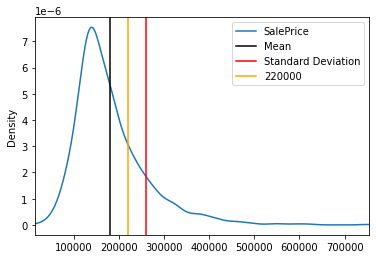

In [19]:
# Now let's try to figure out how far off from the mean a value of \$220,000 is in the distribution of the SalePrice variable.

houses['SalePrice'].plot.kde(xlim = (houses['SalePrice'].min(),
                                     houses['SalePrice'].max()
                                    )      
                            )

st_dev = houses['SalePrice'].std(ddof = 0)                            
mean = houses['SalePrice'].mean()
print('[st_dev] - ',st_dev, '[mean] - ',mean, '\n')

plt.axvline(mean, color='Black', label='Mean')
# Since we want to gauge how far frm the mean the random sample value os, we need to add mean, to get the difference in distance frm mean.
plt.axvline(mean + st_dev, color='Red', label='Standard Deviation')
plt.axvline(220000, color='Orange', label='220000')
plt.legend()

# Examine the graph and figure out whether a price of \$220,000 is very expensive. If it's very expensive, assign True to variable named very_expensive, otherwise assign False.
print('very_expensive = False')


#### Number of Standard Deviations

We determined whether $220,000 is expensive or not by considering both the mean and the standard deviation of the distribution. We found an answer using a kernel density plot, but overall the process took more steps than it was ideal, and we also relied on a visual estimate which lacks high precision.

We need to find a faster and more precise way to measure how far off a value is from the mean (taking into account at the same time the standard deviation of the distribution). Let's take another look at the two distributions



![title](./img/zscore/1_zs.png)


For each distribution, the distance between $220,000 and the mean $180,000 is $40,000. For the distribution on the left, this distance of $40,000 is exactly equal to its standard deviation. With this in mind, we could say that $220,000 is one standard deviation away from the mean — this is the same as saying $220,000 is $40,000 away from the mean (because "one standard deviation" is equivalent to $40,000).

For the distribution on the right, the standard deviation is $10,000. The distance between $220,000 and $180,000 is still $40,000, but in this case $40,000 is four times greater than the standard deviation of $10,000. We could thus say that $220,000 is four standard deviations away from the mean — this is the same as saying that $220,000 is $40,000 away from the mean (because "four standard deviations" is equivalent to $40,000, since one standard deviation is $10,000, and 4×10000=40000).


![title](./img/zscore/2_zs.png)

So it looks like we can measure how far off a value is from the mean in terms of number of standard deviations. If a price of $220,000 is one standard deviation away from the mean, then we can conclude that this value is relatively close to the mean, and it's not very expensive compared to the other prices in the distribution.

If a price of $220,000 is four standard deviations away from the mean, then we know that this value is very far away from the mean. This means that $220,000 is very uncommon and very expensive compared to the other prices in the distribution.

In [26]:
# Divide the distance by the standard deviation of the SalePrice column (assume the data we have is a population) to find the number of standard deviations away from the mean.

# if we have a distance of 6 and a standard deviation of 2, then that is three standard deviations away because 6:2=3.
distance = 220000 - houses['SalePrice'].mean()
st_devs_away = distance / houses['SalePrice'].std(ddof = 0)
st_devs_away

0.4908280788718359

#### Z-Scores

We managed to find the number of standard deviations away from the mean for a value of $220,000 by:
* Finding the distance between the value and the mean (by subtracting the mean from that value).
* Dividing the distance by the standard deviation of the distribution.


![title](./img/zscore/3_zs.png)
![title](./img/zscore/4_zs.png)

In [27]:
from numpy import std

min_val = houses['SalePrice'].min()
mean_val = houses['SalePrice'].mean()
max_val = houses['SalePrice'].max()

def z_score(value, array, bessel=0):
    mean = sum(array) / len(array)

    st_dev = std(array, ddof = bessel)

    ditance = value - mean_val
    z = distance/st_dev
    return z

min_z = z_score(min_val, houses['SalePrice'])
mean_z = z_score(mean_val, houses['SalePrice'])
max_z = z_score(max_val, houses['SalePrice'])

print(min_z, mean_z, max_z)

0.4908280788718359 0.4908280788718359 0.4908280788718359


#### Locating Values in Different Distributions

We're asked by our real estate specialists to analyze historical data on five neighborhoods:

    North Ames.
    College Creek.
    Old Town.
    Edwards.
    Somerset.

Our goal is to find out for which of these neighborhoods a $200,000 house is average-priced. We can solve this task quickly by measuring the z-score for a $200,000 value for each of the five distributions — each of the five neighborhoods has its own distribution of sale prices with its own mean and standard deviation.

We saw in the previous exercise that the mean of a distribution has a z-score of 0, so our recommendation should be the neighborhood with the z-score closest to 0 (we'll detail later in this mission why the mean of a distribution has a z-score of 0).

Note that we can't simply find the mean sale price of each neighborhood and then just subtract $200,000 from the mean to find the neighborhood with the lowest difference. This way we'd fail to take into account the variability of each distribution.



In [30]:
# Find out the location for which $200,000 has the z-score closest to 0.
def z_score(value, array, bessel=0):
    mean = sum(array) / len(array)

    st_dev = std(array, ddof = bessel)

    ditance = value - mean_val
    z = distance/st_dev
    return z

# Segment the data by location
north_ames = houses[houses['Neighborhood'] == 'NAmes']
clg_creek = houses[houses['Neighborhood'] == 'CollgCr']
old_town = houses[houses['Neighborhood'] == 'OldTown']
edwards = houses[houses['Neighborhood'] == 'Edwards']
somerset = houses[houses['Neighborhood'] == 'Somerst']

# Find the z-score for 200000 for every location
z_by_location = {}
for data, neighborhood in [(north_ames, 'NAmes'), (clg_creek, 'CollgCr'),
                     (old_town, 'OldTown'), (edwards, 'Edwards'),
                     (somerset, 'Somerst')]:
    
    z_by_location[neighborhood] = round(z_score(200000, data['SalePrice'],
                                          bessel = 0), 2)

# Find the location with the z-score closest to 0
print(z_by_location)
best_investment = 'College Creek'

{'NAmes': 1.23, 'CollgCr': 0.72, 'OldTown': 0.89, 'Edwards': 0.82, 'Somerst': 0.68}


#### Transforming Distributions

Z-scores are often used to transform entire distributions by converting all the values to z-scores.

We can transform the entire distribution by converting each value to a z-score. In the next code block, we will:
* Convert each value to a z-score by using the Series.apply() method.
* Store the z-scores in a separate column named z_prices.
* Plot side by side the kernel density plot for the original values and the kernel density plot for the z-scores.


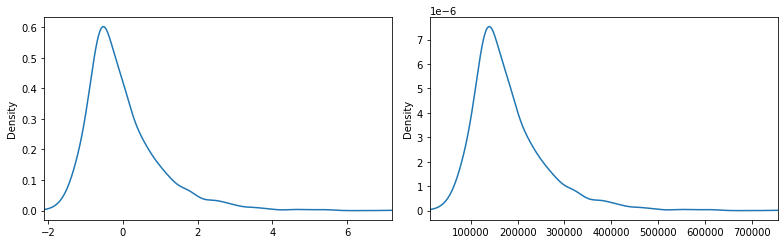

In [3]:
mean = houses['SalePrice'].mean()
st_dev = houses['SalePrice'].std(ddof=0)

houses['z_prices'] = houses['SalePrice'].apply(lambda x: ((x - mean) / st_dev))

plt.figure(figsize = (11, 3.5))

plt.subplot(1, 2, 1)
houses['z_prices'].plot.kde(xlim = (houses['z_prices'].min(), houses['z_prices'].max()))

plt.subplot(1, 2, 2)
houses['SalePrice'].plot.kde(xlim =(houses['SalePrice'].min(), houses['SalePrice'].max()))

plt.tight_layout() # to avoid partial overlay of plots

Notice that the shape of the initial distribution is preserved perfectly in the new distribution of z-scores. 

In [8]:
# Transforming 'SalePrice'
mean = houses['SalePrice'].mean()
st_dev = houses['SalePrice'].std(ddof = 0)
houses['z_prices'] = houses['SalePrice'].apply(
                            lambda x: ((x - mean) / st_dev)
                    )

z_mean_price = houses['z_prices'].mean()
z_stdev_price = houses['z_prices'].std(ddof=0)
print('[z_mean_price] -',z_mean_price, '[z_stdev_price] - ', z_stdev_price)

# Transforming 'Lot Area'
mean_area = houses['Lot Area'].mean()
stdev_area = houses['Lot Area'].std(ddof=0)
houses['z_area'] = houses['Lot Area'].apply(lambda x: ((x - mean_area) / stdev_area))

z_mean_area = houses['z_area'].mean()
z_stdev_area = houses['z_area'].std(ddof=0)
print('[z_mean_area] -',z_mean_area, '[z_stdev_area] - ', z_stdev_area)

[z_mean_price] - -1.0185254232738638e-16 [z_stdev_price] -  1.0
[z_mean_area] - -1.94004842528355e-17 [z_stdev_area] -  1.0


**For every distribution of z-scores, the mean is always 0 and the standard deviation is always 1.**

#### The Standard Distribution

#### Standardizing Samples

#### Using Standardization for Comparisons

#### Converting Back from Z-scores